In [2]:
import os
import tarfile
import urllib

# Downloading the data
 

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [4]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [5]:
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [7]:
fetch_housing_data()
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()

# The data

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
import matplotlib.pyplot as plt

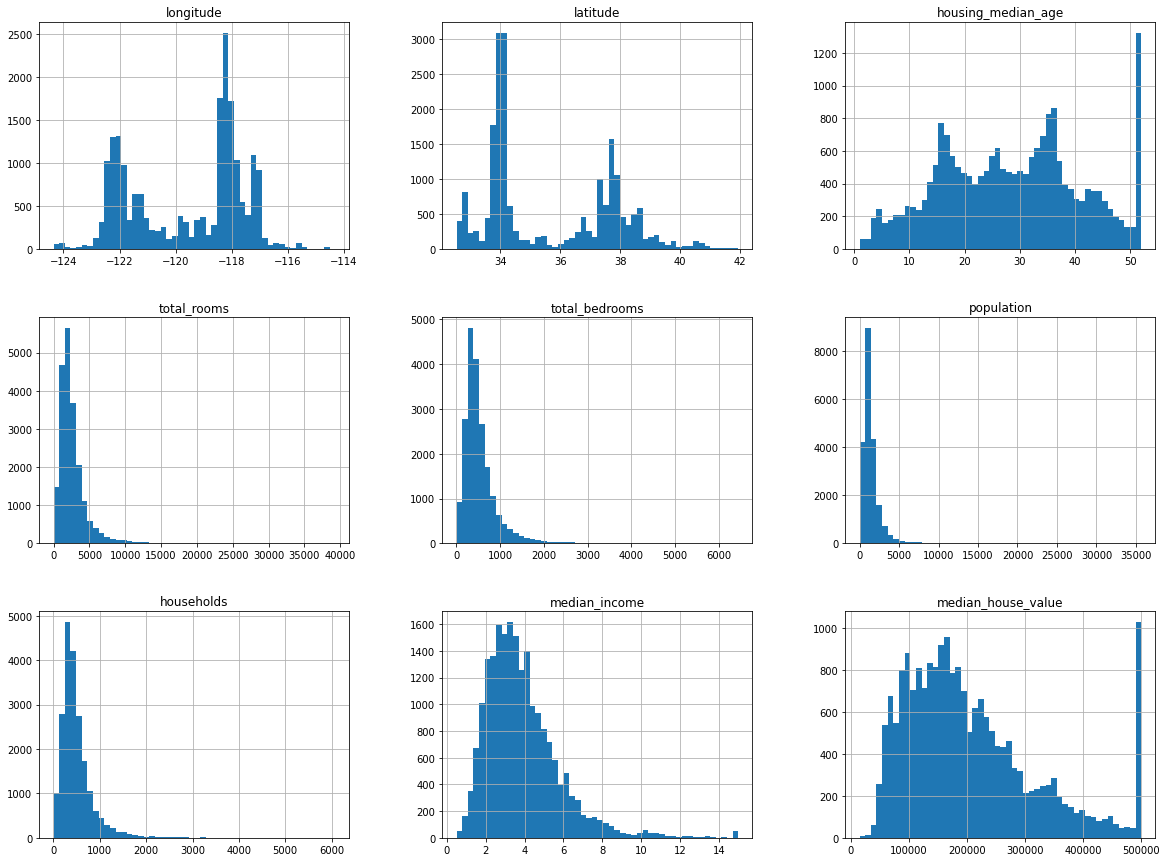

In [14]:
%matplotlib inline
housing.hist(bins = 50, figsize = (20,15))
plt.show()


# Creating Test and Train sets


In [15]:
import numpy as np

In [16]:
def split_train_test(data, test_ratio):
    np.random.seed(24)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(housing, 0.2)

In [18]:
len(train_set)


16512

In [19]:
len(test_set)

4128

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 24)

In [21]:
import pandas as pd
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

<AxesSubplot:>

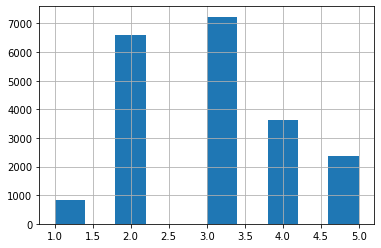

In [22]:
housing['income_cat'].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 24)

In [25]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [26]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [27]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

c:\users\adity\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Visualizing the Data to Gain Insights

In [28]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

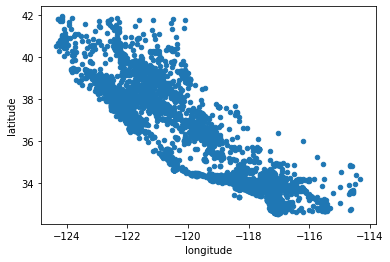

In [30]:
housing.plot(kind = 'scatter', x = 'longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

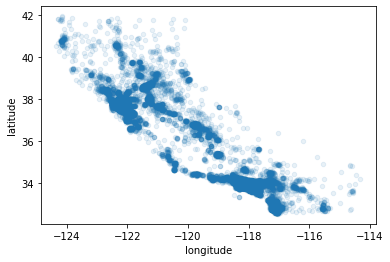

In [31]:
housing.plot(kind = 'scatter', x = 'longitude', y='latitude', alpha = 0.1)

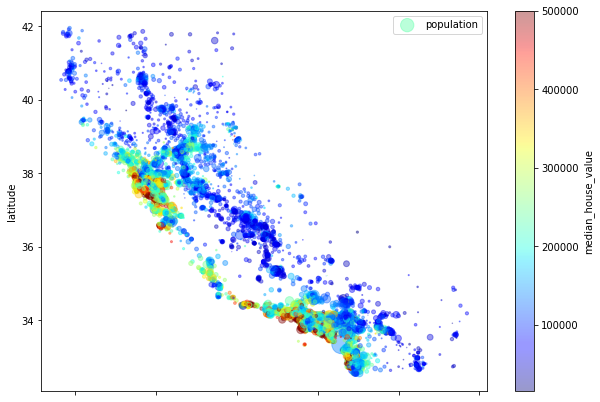

In [34]:
housing.plot(kind = 'scatter', x = 'longitude', y='latitude', alpha = 0.4, s = housing["population"]/100, label = "population", figsize = (10,7), c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()

# Finding correlations 

In [35]:
corr_matrix = housing.corr()

In [37]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690034
total_rooms           0.136294
housing_median_age    0.101460
households            0.067978
total_bedrooms        0.052073
population           -0.019722
longitude            -0.044724
latitude             -0.144983
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

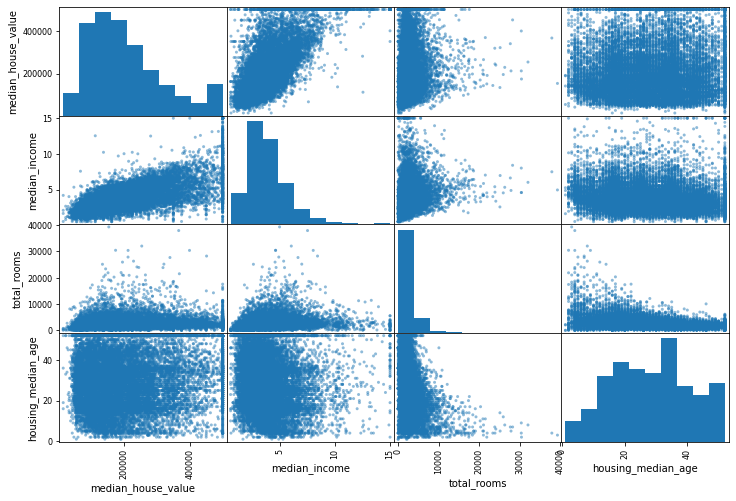

In [38]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

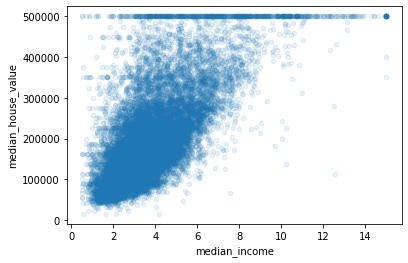

In [39]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

# Looking at interesting attribute combinations

In [40]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [43]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [44]:
housing['population_per_household'] = housing['population']/housing['households']

In [45]:
corr_matrix = housing.corr()

In [46]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690034
rooms_per_household         0.144218
total_rooms                 0.136294
housing_median_age          0.101460
households                  0.067978
total_bedrooms              0.052073
population                 -0.019722
population_per_household   -0.021874
longitude                  -0.044724
latitude                   -0.144983
bedrooms_per_room          -0.255067
Name: median_house_value, dtype: float64

# Cleaning the Data

In [48]:
housing = strat_train_set.drop("median_house_value", axis = 1)

In [49]:
housing_labels = strat_train_set["median_house_value"].copy()

### Getting rid off null values

In [50]:
housing.dropna(subset = ["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6562,-118.13,34.20,45.0,1213.0,206.0,529.0,231.0,5.6629,INLAND
6157,-117.96,34.08,39.0,1076.0,338.0,1242.0,332.0,2.2679,<1H OCEAN
18969,-122.02,38.26,20.0,3899.0,763.0,2198.0,779.0,3.2061,INLAND
19352,-122.95,38.73,37.0,1548.0,328.0,863.0,287.0,2.9792,<1H OCEAN
3729,-118.42,34.18,40.0,1013.0,150.0,449.0,166.0,5.7143,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
4057,-118.44,34.15,15.0,4420.0,1076.0,1669.0,1016.0,4.6375,<1H OCEAN
14734,-117.02,32.81,14.0,3173.0,599.0,1451.0,585.0,3.7292,<1H OCEAN
19497,-121.00,37.66,43.0,2039.0,331.0,875.0,342.0,3.9844,INLAND
13151,-121.53,36.85,23.0,3359.0,725.0,1862.0,651.0,2.6719,INLAND


### Converting a categorical argument into numerical

In [54]:
housing_cat = housing[['ocean_proximity']]

In [56]:
housing_cat.head(10)

,ocean_proximity
6562,INLAND
6157,<1H OCEAN
18969,INLAND
19352,<1H OCEAN
3729,<1H OCEAN
5107,<1H OCEAN
1206,INLAND
13887,INLAND
15687,NEAR BAY
11193,<1H OCEAN


In [57]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
ordinal_encoder = OrdinalEncoder()

In [59]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [60]:
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [0.]])